In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
pieman_db = niidb.FMriActivationsDb('data/new_pieman.db', mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(pieman_db.all(), mask='/home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/18/2018 17:50:11 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-19-task-intact2.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/18/2018 17:50:14 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-70-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/18/2018 17:50:17 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-72-task-rest1.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/18/2018 17:50:21 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/18/2018 17:50:24 Loading Nifti image /home/eli/Documents/new_pieman/all_tasks/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/all_tasks/wholebrain.nii.gz (zscore=True)
06/18/2018 17:50:26 Loading Nifti image /home/eli/Documents/new_pieman

In [6]:
dtfa.normalize_activations()

[tensor(12.2729),
 tensor(9.2042),
 tensor(12.6580),
 tensor(9.9738),
 tensor(7.0842),
 tensor(9.9237),
 tensor(10.2433),
 tensor(10.2612),
 tensor(8.7070),
 tensor(7.7017),
 tensor(10.8527),
 tensor(10.2880),
 tensor(11.3409),
 tensor(11.0083),
 tensor(12.6250),
 tensor(7.2968),
 tensor(12.5708),
 tensor(8.4854),
 tensor(7.3136),
 tensor(12.2830),
 tensor(10.2043),
 tensor(9.0469),
 tensor(10.5180),
 tensor(6.8116),
 tensor(13.3261),
 tensor(11.3348),
 tensor(8.8084),
 tensor(9.4964),
 tensor(8.5167),
 tensor(5.8718),
 tensor(10.5468),
 tensor(9.7670),
 tensor(9.2599),
 tensor(10.2043),
 tensor(15.1249),
 tensor(8.0562),
 tensor(7.7584),
 tensor(9.9733),
 tensor(7.6223),
 tensor(8.8967),
 tensor(12.6606),
 tensor(7.4495),
 tensor(15.5977),
 tensor(12.4870),
 tensor(10.2933),
 tensor(10.8071),
 tensor(8.2048),
 tensor(11.1849),
 tensor(11.2075),
 tensor(13.5786),
 tensor(10.7469),
 tensor(10.0744),
 tensor(9.4964),
 tensor(8.5904),
 tensor(6.8412),
 tensor(8.6002),
 tensor(8.9757),
 te

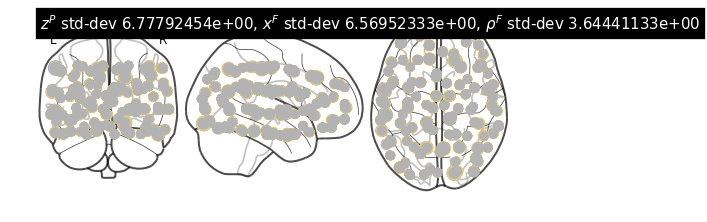

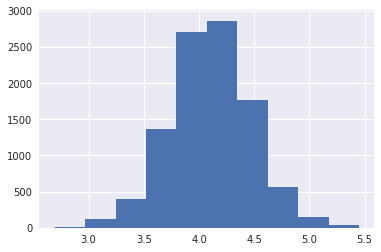

(<nilearn.plotting.displays.OrthoProjector at 0x7f4e040e3a58>,
 tensor([[[ -2.7960,  -7.2020,  -4.7476],
          [ -0.8890, -88.8306,   4.4310],
          [-33.4417, -44.6754,   1.7843],
          ...,
          [-16.8117,  60.0595,   2.0233],
          [-18.9644,   5.9057,  40.8468],
          [ 38.5609, -34.8068,   0.5659]],
 
         [[ -1.1335,  -7.6207,  -5.2421],
          [ -0.6280, -88.3620,   4.7584],
          [-33.4496, -45.1628,   1.4383],
          ...,
          [-16.5059,  60.9921,   2.6648],
          [-17.3720,   6.0303,  40.4209],
          [ 39.4119, -34.6781,   0.5916]],
 
         [[ -1.8834,  -7.6056,  -4.9919],
          [ -0.6788, -88.3113,   5.0390],
          [-33.7125, -44.9258,   1.4240],
          ...,
          [-17.4317,  60.7112,   2.6068],
          [-17.5156,   6.8151,  40.2784],
          [ 38.4677, -35.4463,   0.2904]],
 
         ...,
 
         [[ -2.6652,  -7.3582,  -4.6326],
          [ -0.8932, -88.5479,   4.6441],
          [-33.8599, -44.53

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=700, learning_rate=1e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=100, use_cuda=True, checkpoint_steps=50, blocks_batch_size=4)

06/18/2018 17:58:07 [Epoch 1] (40926ms) Posterior free-energy 3.57730381e+09 = KL from prior 4.67592300e+06 - log-likelihood -3.57262758e+09
06/18/2018 17:58:07 Saving checkpoint...
06/18/2018 17:58:50 [Epoch 2] (42291ms) Posterior free-energy 3.52928845e+09 = KL from prior 3.08659812e+06 - log-likelihood -3.52620211e+09
06/18/2018 17:59:31 [Epoch 3] (41816ms) Posterior free-energy 3.52795802e+09 = KL from prior 2.17975431e+06 - log-likelihood -3.52577792e+09
06/18/2018 18:00:16 [Epoch 4] (44258ms) Posterior free-energy 3.52745498e+09 = KL from prior 1.82143712e+06 - log-likelihood -3.52563290e+09
06/18/2018 18:00:58 [Epoch 5] (42670ms) Posterior free-energy 3.52722099e+09 = KL from prior 1.67046056e+06 - log-likelihood -3.52555072e+09
06/18/2018 18:01:39 [Epoch 6] (40529ms) Posterior free-energy 3.52708915e+09 = KL from prior 1.57817438e+06 - log-likelihood -3.52551066e+09
06/18/2018 18:02:19 [Epoch 7] (40351ms) Posterior free-energy 3.52700928e+09 = KL from prior 1.52100653e+06 - log

Epoch    24: reducing learning rate of group 0 to 5.0000e-03.


06/18/2018 18:14:56 [Epoch 26] (36075ms) Posterior free-energy 3.52650138e+09 = KL from prior 1.07413412e+06 - log-likelihood -3.52542720e+09
06/18/2018 18:15:32 [Epoch 27] (35737ms) Posterior free-energy 3.52646042e+09 = KL from prior 1.03491169e+06 - log-likelihood -3.52542592e+09
06/18/2018 18:16:08 [Epoch 28] (36352ms) Posterior free-energy 3.52642765e+09 = KL from prior 1.00338647e+06 - log-likelihood -3.52542438e+09
06/18/2018 18:16:46 [Epoch 29] (38206ms) Posterior free-energy 3.52640051e+09 = KL from prior 9.78252219e+05 - log-likelihood -3.52542221e+09
06/18/2018 18:17:28 [Epoch 30] (41975ms) Posterior free-energy 3.52637696e+09 = KL from prior 9.57222625e+05 - log-likelihood -3.52541978e+09
06/18/2018 18:18:08 [Epoch 31] (40090ms) Posterior free-energy 3.52635904e+09 = KL from prior 9.40295938e+05 - log-likelihood -3.52541850e+09
06/18/2018 18:18:50 [Epoch 32] (41411ms) Posterior free-energy 3.52634061e+09 = KL from prior 9.27564438e+05 - log-likelihood -3.52541274e+09
06/18/

Epoch   154: reducing learning rate of group 0 to 2.5000e-03.


06/18/2018 19:43:13 [Epoch 156] (42006ms) Posterior free-energy 2.68075213e+09 = KL from prior 1.20507985e+07 - log-likelihood -2.66870138e+09
06/18/2018 19:43:56 [Epoch 157] (42838ms) Posterior free-energy 2.66857446e+09 = KL from prior 1.21247268e+07 - log-likelihood -2.65644960e+09
06/18/2018 19:44:38 [Epoch 158] (41814ms) Posterior free-energy 2.66246554e+09 = KL from prior 1.21737328e+07 - log-likelihood -2.65029165e+09
06/18/2018 19:45:20 [Epoch 159] (42325ms) Posterior free-energy 2.65913062e+09 = KL from prior 1.22250318e+07 - log-likelihood -2.64690566e+09
06/18/2018 19:46:01 [Epoch 160] (41359ms) Posterior free-energy 2.65701888e+09 = KL from prior 1.22883088e+07 - log-likelihood -2.64473056e+09
06/18/2018 19:46:42 [Epoch 161] (40449ms) Posterior free-energy 2.65561139e+09 = KL from prior 1.23400792e+07 - log-likelihood -2.64327136e+09
06/18/2018 19:47:22 [Epoch 162] (40449ms) Posterior free-energy 2.65463091e+09 = KL from prior 1.23496785e+07 - log-likelihood -2.64228160e+09

Epoch   225: reducing learning rate of group 0 to 1.2500e-03.


06/18/2018 20:31:34 [Epoch 227] (43218ms) Posterior free-energy 2.64229504e+09 = KL from prior 1.27613045e+07 - log-likelihood -2.62953395e+09
06/18/2018 20:32:16 [Epoch 228] (41621ms) Posterior free-energy 2.64082330e+09 = KL from prior 1.27753755e+07 - log-likelihood -2.62804794e+09
06/18/2018 20:32:56 [Epoch 229] (40921ms) Posterior free-energy 2.63918976e+09 = KL from prior 1.27848875e+07 - log-likelihood -2.62640480e+09
06/18/2018 20:33:38 [Epoch 230] (41627ms) Posterior free-energy 2.63815398e+09 = KL from prior 1.27980415e+07 - log-likelihood -2.62535597e+09
06/18/2018 20:34:19 [Epoch 231] (40841ms) Posterior free-energy 2.63753958e+09 = KL from prior 1.27992110e+07 - log-likelihood -2.62474022e+09
06/18/2018 20:35:01 [Epoch 232] (41538ms) Posterior free-energy 2.63707315e+09 = KL from prior 1.28318595e+07 - log-likelihood -2.62424147e+09
06/18/2018 20:35:43 [Epoch 233] (42525ms) Posterior free-energy 2.63677696e+09 = KL from prior 1.28287460e+07 - log-likelihood -2.62394829e+09

Epoch   412: reducing learning rate of group 0 to 6.2500e-04.


06/18/2018 22:39:20 [Epoch 414] (36179ms) Posterior free-energy 2.62633779e+09 = KL from prior 1.32358835e+07 - log-likelihood -2.61310221e+09
06/18/2018 22:40:00 [Epoch 415] (39540ms) Posterior free-energy 2.62626970e+09 = KL from prior 1.32331905e+07 - log-likelihood -2.61303674e+09
06/18/2018 22:40:42 [Epoch 416] (41940ms) Posterior free-energy 2.62601830e+09 = KL from prior 1.32338145e+07 - log-likelihood -2.61278464e+09
06/18/2018 22:41:22 [Epoch 417] (40554ms) Posterior free-energy 2.62580301e+09 = KL from prior 1.32261410e+07 - log-likelihood -2.61257709e+09
06/18/2018 22:42:03 [Epoch 418] (40530ms) Posterior free-energy 2.62563686e+09 = KL from prior 1.32348295e+07 - log-likelihood -2.61240205e+09
06/18/2018 22:42:45 [Epoch 419] (41686ms) Posterior free-energy 2.62552781e+09 = KL from prior 1.32258650e+07 - log-likelihood -2.61230208e+09
06/18/2018 22:43:26 [Epoch 420] (41544ms) Posterior free-energy 2.62544307e+09 = KL from prior 1.32312575e+07 - log-likelihood -2.61221203e+09

Epoch   444: reducing learning rate of group 0 to 3.1250e-04.


06/18/2018 23:01:03 [Epoch 446] (37809ms) Posterior free-energy 2.62470810e+09 = KL from prior 1.32554345e+07 - log-likelihood -2.61145280e+09
06/18/2018 23:01:40 [Epoch 447] (36317ms) Posterior free-energy 2.62468659e+09 = KL from prior 1.32505355e+07 - log-likelihood -2.61143590e+09
06/18/2018 23:02:16 [Epoch 448] (36433ms) Posterior free-energy 2.62467456e+09 = KL from prior 1.32580295e+07 - log-likelihood -2.61141677e+09
06/18/2018 23:02:53 [Epoch 449] (36543ms) Posterior free-energy 2.62466432e+09 = KL from prior 1.32497190e+07 - log-likelihood -2.61141434e+09
06/18/2018 23:03:32 [Epoch 450] (39749ms) Posterior free-energy 2.62463872e+09 = KL from prior 1.32582505e+07 - log-likelihood -2.61138022e+09
06/18/2018 23:04:14 [Epoch 451] (41186ms) Posterior free-energy 2.62464461e+09 = KL from prior 1.32481840e+07 - log-likelihood -2.61139629e+09
06/18/2018 23:04:14 Saving checkpoint...
06/18/2018 23:04:52 [Epoch 452] (37947ms) Posterior free-energy 2.62462310e+09 = KL from prior 1.3254

Epoch   457: reducing learning rate of group 0 to 1.5625e-04.


06/18/2018 23:09:30 [Epoch 459] (38366ms) Posterior free-energy 2.62453325e+09 = KL from prior 1.32574465e+07 - log-likelihood -2.61127584e+09
06/18/2018 23:10:08 [Epoch 460] (37589ms) Posterior free-energy 2.62453734e+09 = KL from prior 1.32619030e+07 - log-likelihood -2.61127533e+09
06/18/2018 23:10:46 [Epoch 461] (38325ms) Posterior free-energy 2.62452122e+09 = KL from prior 1.32490770e+07 - log-likelihood -2.61127206e+09
06/18/2018 23:11:22 [Epoch 462] (36510ms) Posterior free-energy 2.62451635e+09 = KL from prior 1.32529730e+07 - log-likelihood -2.61126349e+09
06/18/2018 23:12:00 [Epoch 463] (37296ms) Posterior free-energy 2.62450278e+09 = KL from prior 1.32595015e+07 - log-likelihood -2.61124358e+09
06/18/2018 23:12:37 [Epoch 464] (37118ms) Posterior free-energy 2.62449331e+09 = KL from prior 1.32703230e+07 - log-likelihood -2.61122278e+09
06/18/2018 23:13:19 [Epoch 465] (42084ms) Posterior free-energy 2.62449715e+09 = KL from prior 1.32587115e+07 - log-likelihood -2.61123872e+09

Epoch   468: reducing learning rate of group 0 to 7.8125e-05.


06/18/2018 23:16:45 [Epoch 470] (40596ms) Posterior free-energy 2.62445568e+09 = KL from prior 1.32628770e+07 - log-likelihood -2.61119296e+09
06/18/2018 23:17:25 [Epoch 471] (40589ms) Posterior free-energy 2.62445952e+09 = KL from prior 1.32670965e+07 - log-likelihood -2.61119232e+09
06/18/2018 23:18:07 [Epoch 472] (41643ms) Posterior free-energy 2.62445824e+09 = KL from prior 1.32633710e+07 - log-likelihood -2.61119520e+09
06/18/2018 23:18:49 [Epoch 473] (42214ms) Posterior free-energy 2.62444723e+09 = KL from prior 1.32616920e+07 - log-likelihood -2.61118566e+09
06/18/2018 23:19:30 [Epoch 474] (40648ms) Posterior free-energy 2.62443827e+09 = KL from prior 1.32634655e+07 - log-likelihood -2.61117485e+09
06/18/2018 23:20:12 [Epoch 475] (42470ms) Posterior free-energy 2.62445466e+09 = KL from prior 1.32566420e+07 - log-likelihood -2.61119808e+09
06/18/2018 23:20:54 [Epoch 476] (41420ms) Posterior free-energy 2.62444621e+09 = KL from prior 1.32627760e+07 - log-likelihood -2.61118304e+09

Epoch   479: reducing learning rate of group 0 to 3.9063e-05.


06/18/2018 23:24:20 [Epoch 481] (40853ms) Posterior free-energy 2.62441651e+09 = KL from prior 1.32696950e+07 - log-likelihood -2.61114694e+09
06/18/2018 23:25:01 [Epoch 482] (40731ms) Posterior free-energy 2.62442470e+09 = KL from prior 1.32599815e+07 - log-likelihood -2.61116448e+09
06/18/2018 23:25:41 [Epoch 483] (40654ms) Posterior free-energy 2.62441011e+09 = KL from prior 1.32567060e+07 - log-likelihood -2.61115341e+09
06/18/2018 23:26:20 [Epoch 484] (38365ms) Posterior free-energy 2.62442086e+09 = KL from prior 1.32642900e+07 - log-likelihood -2.61115629e+09
06/18/2018 23:27:02 [Epoch 485] (42144ms) Posterior free-energy 2.62443418e+09 = KL from prior 1.32622620e+07 - log-likelihood -2.61117210e+09
06/18/2018 23:27:43 [Epoch 486] (40748ms) Posterior free-energy 2.62441165e+09 = KL from prior 1.32556555e+07 - log-likelihood -2.61115622e+09
06/18/2018 23:28:24 [Epoch 487] (41339ms) Posterior free-energy 2.62440858e+09 = KL from prior 1.32545875e+07 - log-likelihood -2.61115398e+09

Epoch   491: reducing learning rate of group 0 to 1.9531e-05.


06/18/2018 23:32:28 [Epoch 493] (41612ms) Posterior free-energy 2.62440090e+09 = KL from prior 1.32652175e+07 - log-likelihood -2.61113581e+09
06/18/2018 23:33:11 [Epoch 494] (42811ms) Posterior free-energy 2.62439834e+09 = KL from prior 1.32567680e+07 - log-likelihood -2.61114157e+09
06/18/2018 23:33:51 [Epoch 495] (40747ms) Posterior free-energy 2.62441114e+09 = KL from prior 1.32591035e+07 - log-likelihood -2.61115213e+09
06/18/2018 23:34:29 [Epoch 496] (37511ms) Posterior free-energy 2.62439245e+09 = KL from prior 1.32603030e+07 - log-likelihood -2.61113197e+09
06/18/2018 23:35:06 [Epoch 497] (37486ms) Posterior free-energy 2.62439680e+09 = KL from prior 1.32668110e+07 - log-likelihood -2.61112992e+09
06/18/2018 23:35:46 [Epoch 498] (39234ms) Posterior free-energy 2.62438835e+09 = KL from prior 1.32645275e+07 - log-likelihood -2.61112410e+09
06/18/2018 23:36:29 [Epoch 499] (43028ms) Posterior free-energy 2.62439680e+09 = KL from prior 1.32676775e+07 - log-likelihood -2.61112941e+09

Epoch   502: reducing learning rate of group 0 to 1.0000e-05.


06/18/2018 23:39:56 [Epoch 504] (41916ms) Posterior free-energy 2.62439270e+09 = KL from prior 1.32636720e+07 - log-likelihood -2.61112922e+09
06/18/2018 23:40:37 [Epoch 505] (40982ms) Posterior free-energy 2.62439219e+09 = KL from prior 1.32713005e+07 - log-likelihood -2.61112064e+09
06/18/2018 23:41:17 [Epoch 506] (40760ms) Posterior free-energy 2.62439885e+09 = KL from prior 1.32619700e+07 - log-likelihood -2.61113696e+09
06/18/2018 23:41:58 [Epoch 507] (40557ms) Posterior free-energy 2.62438349e+09 = KL from prior 1.32688930e+07 - log-likelihood -2.61111424e+09
06/18/2018 23:42:41 [Epoch 508] (42858ms) Posterior free-energy 2.62439629e+09 = KL from prior 1.32573670e+07 - log-likelihood -2.61113875e+09
06/18/2018 23:43:24 [Epoch 509] (43191ms) Posterior free-energy 2.62439578e+09 = KL from prior 1.32605550e+07 - log-likelihood -2.61113549e+09
06/18/2018 23:44:06 [Epoch 510] (42028ms) Posterior free-energy 2.62438502e+09 = KL from prior 1.32608690e+07 - log-likelihood -2.61112461e+09

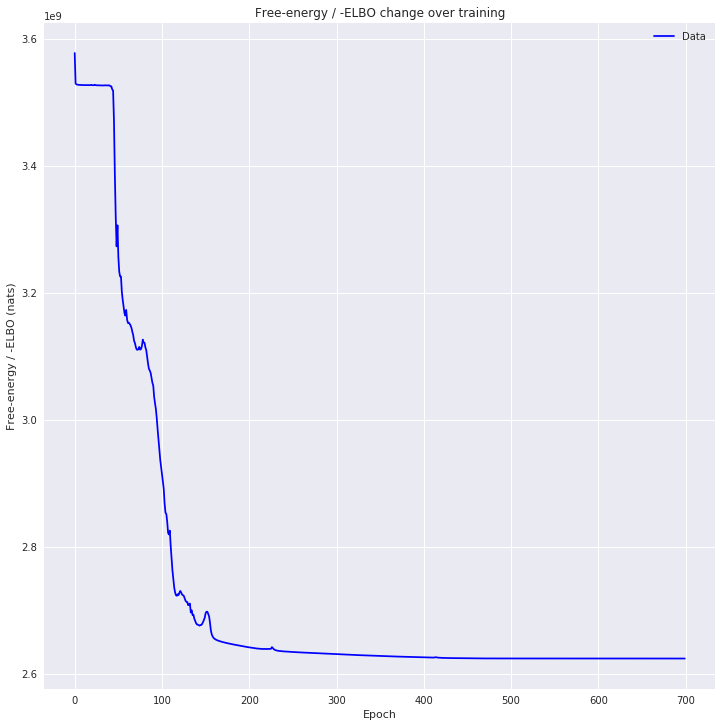

In [9]:
utils.plot_losses(losses)

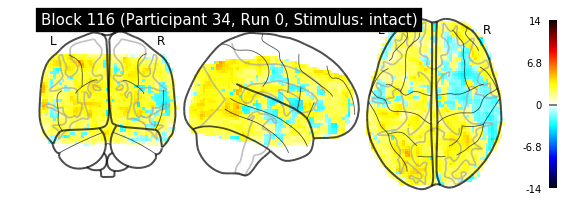

06/19/2018 01:54:05 Reconstruction Error (Frobenius Norm): 3.43123877e+03 out of 4.28305078e+03


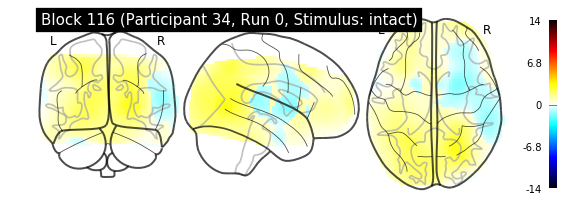

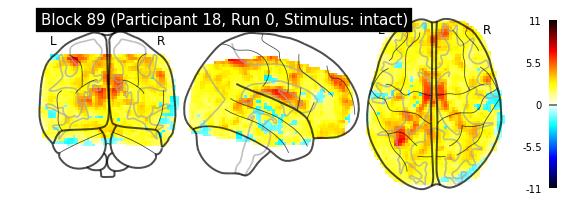

06/19/2018 01:54:36 Reconstruction Error (Frobenius Norm): 3.25791895e+03 out of 4.28307861e+03


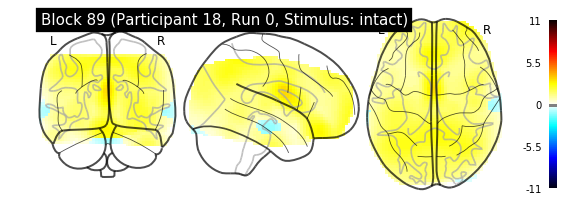

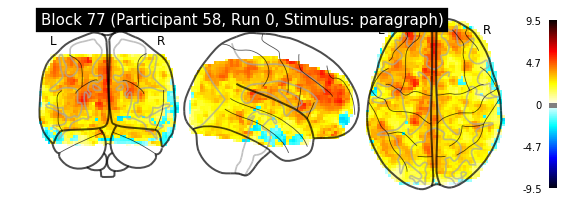

06/19/2018 01:55:07 Reconstruction Error (Frobenius Norm): 3.28240015e+03 out of 4.28308008e+03


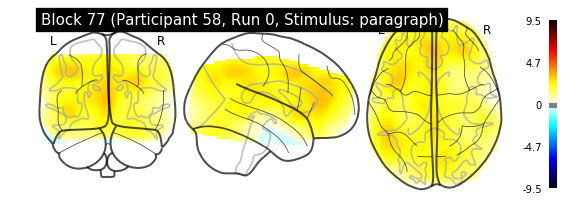

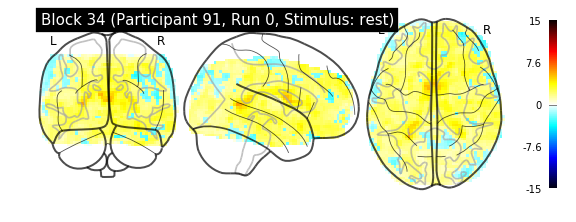

06/19/2018 01:55:47 Reconstruction Error (Frobenius Norm): 4.15587061e+03 out of 4.94739307e+03


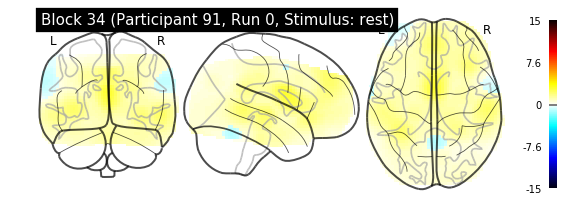

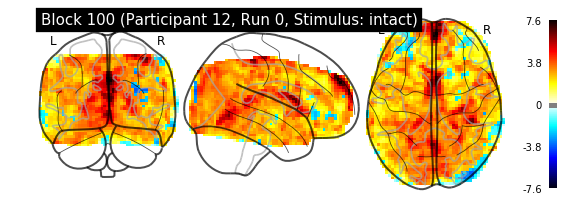

06/19/2018 01:56:17 Reconstruction Error (Frobenius Norm): 3.32036523e+03 out of 4.28307080e+03


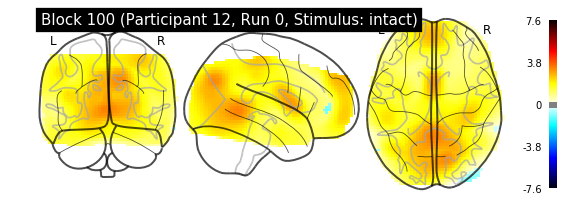

In [10]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [11]:
def task_labeler(b):
    return b.task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


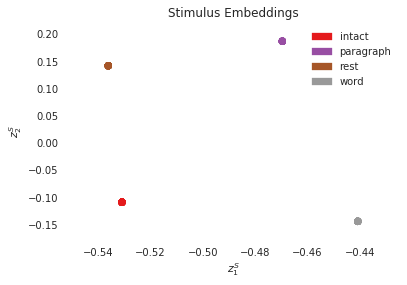

In [12]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [13]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


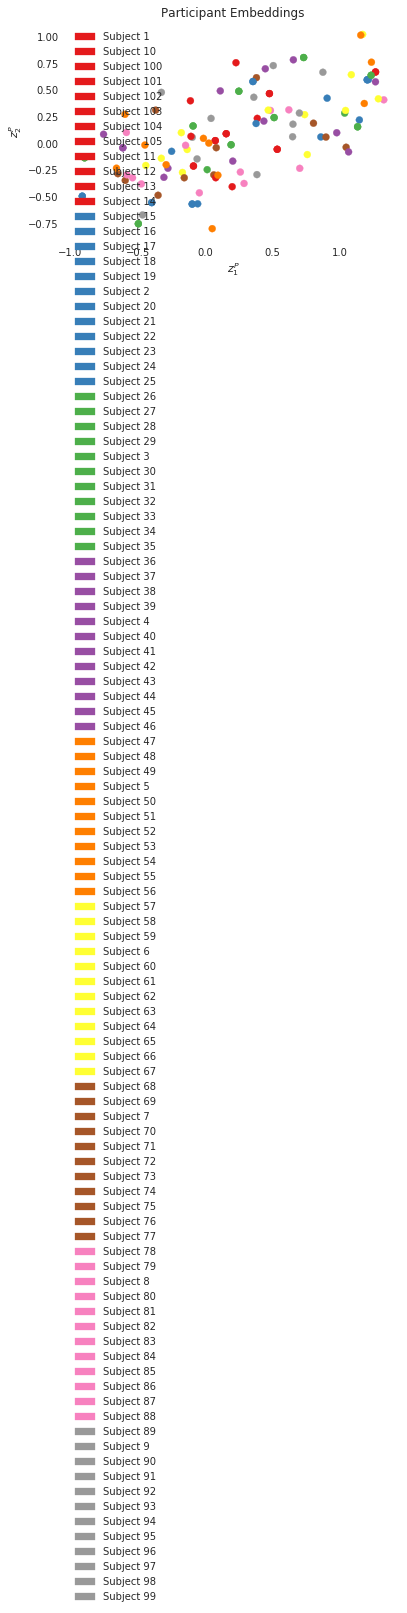

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

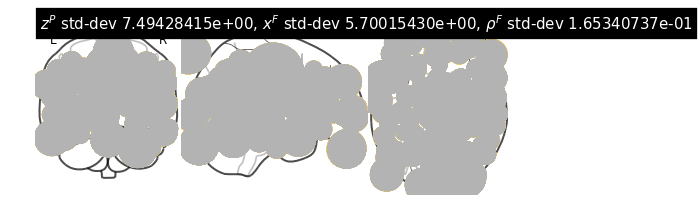

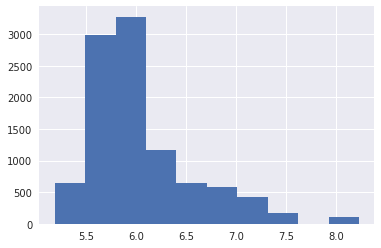

(<nilearn.plotting.displays.OrthoProjector at 0x7f4c396e05f8>,
 tensor([[[-6.3555e-01, -1.4973e+01, -8.9128e+00],
          [ 2.1227e+00, -8.1385e+01,  3.0469e+00],
          [-3.5512e+01, -4.5446e+01, -4.0694e-02],
          ...,
          [-3.4258e+01,  6.8381e+01, -6.3010e+00],
          [-2.4833e+01,  2.0779e+01,  2.9588e+01],
          [ 3.7684e+01, -4.2213e+01, -4.3843e+00]],
 
         [[-6.9614e-01, -1.4786e+01, -8.9860e+00],
          [ 2.2942e+00, -8.1410e+01,  3.3318e+00],
          [-3.5291e+01, -4.5261e+01,  1.8404e-02],
          ...,
          [-3.4050e+01,  6.8451e+01, -6.5954e+00],
          [-2.4867e+01,  2.0777e+01,  2.9570e+01],
          [ 3.7463e+01, -4.2234e+01, -4.3140e+00]],
 
         [[-4.9646e-01, -1.5310e+01, -8.6490e+00],
          [ 1.6767e+00, -8.1228e+01,  1.9322e+00],
          [-3.6503e+01, -4.6130e+01, -2.8440e-01],
          ...,
          [-3.4972e+01,  6.7284e+01, -4.9758e+00],
          [-2.4310e+01,  2.0761e+01,  2.9957e+01],
          [ 3.8485e

In [15]:
dtfa.visualize_factor_embedding()